# UW-Madison-GI-Tract-Image-Segmentation-Prediction_Demo

### This notebook is a demo notebook as a final presentation demo for UW course CSE455 Computer Vision.

1. Import libraries

In [1]:
import albumentations as A
import cv2
import numpy as np
import torch
import torch.nn as nn

import utils
import train

2. Import Image for Prediction

In [2]:
# Loading and normalizing
PATH = f"./train/case2/case2_day3/scans/slice_0099_266_266_1.50_1.50.png"
img = utils.load_img(PATH)

In [3]:
# Precosessing: resize and transpose
assert img is not None, "Image not found or failed to load."
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img = A.resize(img, *train.CFG.img_size, interpolation=cv2.INTER_NEAREST)
inputs = np.transpose(img, (2, 0, 1))
inputs = torch.tensor(inputs).to(device)

3. Load Pretrained Model

In [4]:
MODEL_PATH = f"./best_epoch-00.bin"
model = train.load_model(MODEL_PATH)
model = model.to(device)

4. Make Prediction and Visualize Result

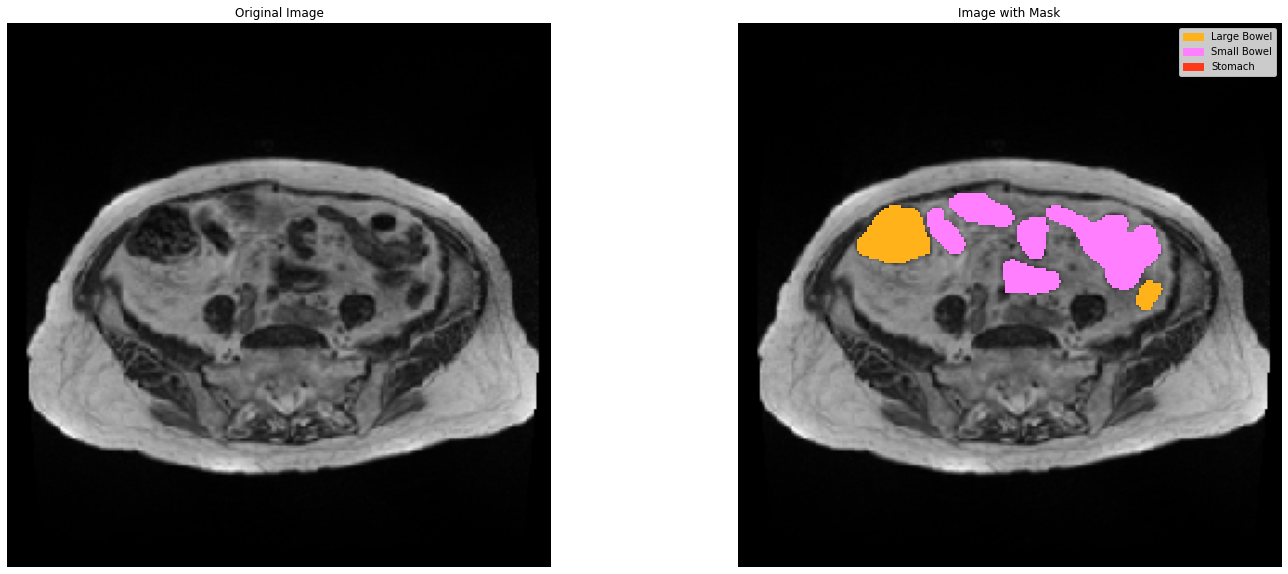

In [5]:
pred = model(inputs.unsqueeze(0)).squeeze(0)
pred = nn.Sigmoid()(pred)
pred = pred.permute(1, 2, 0)
pred = (pred > 0.5).to(torch.float32)
utils.plot_original_mask(img, pred.detach().cpu())

Comparing with ground truth

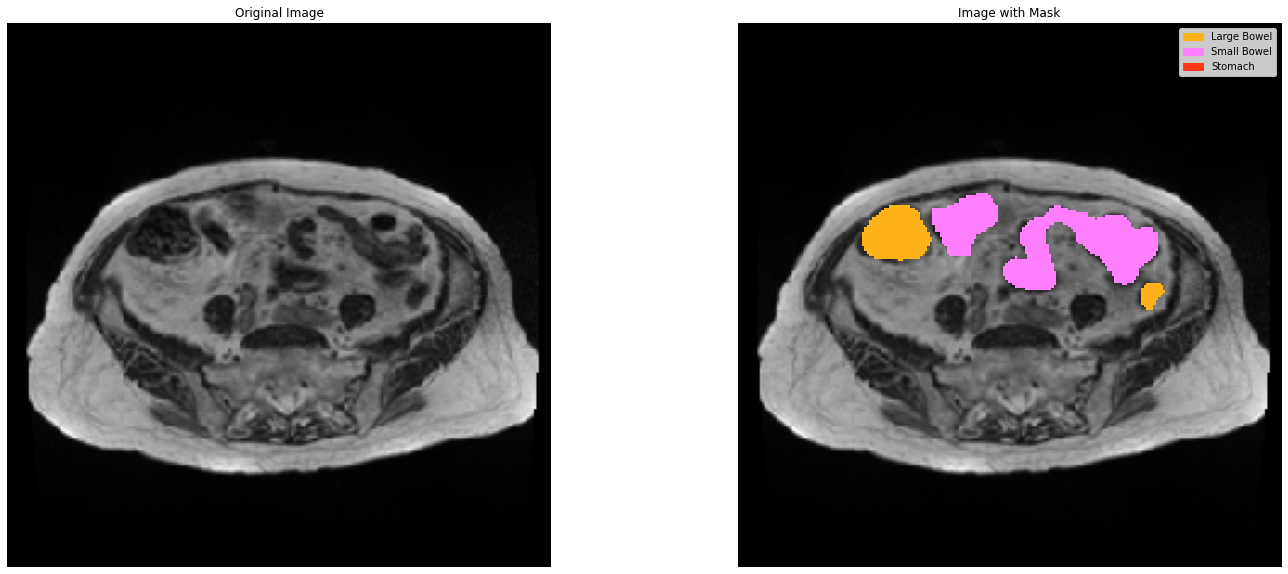

In [6]:
MASK_PATH = f"./train_masks/case2_day3_slice_0099.png"
mask = cv2.imread(MASK_PATH, cv2.IMREAD_UNCHANGED)
mask = A.resize(mask, *train.CFG.img_size, interpolation=cv2.INTER_NEAREST)
utils.plot_original_mask(img, mask)